# Tugas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hdbscan

# Load dataset iris
data = load_iris()
X = data.data
y = data.target

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
# Inisialisasi dan fit model HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X_scaled)

# Info hasil clustering
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Jumlah cluster terbentuk: {n_clusters}")
print(f"Jumlah noise: {n_noise}")


Jumlah cluster terbentuk: 2
Jumlah noise: 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


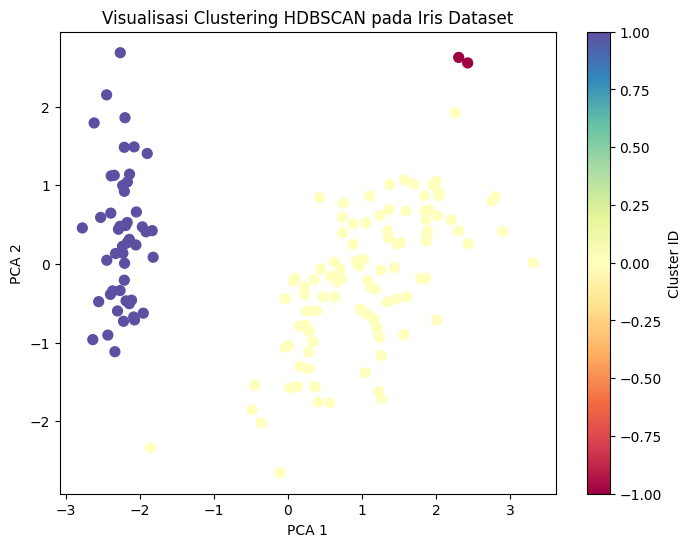

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=cluster_labels, cmap='Spectral', s=50)
plt.title('Visualisasi Clustering HDBSCAN pada Iris Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()


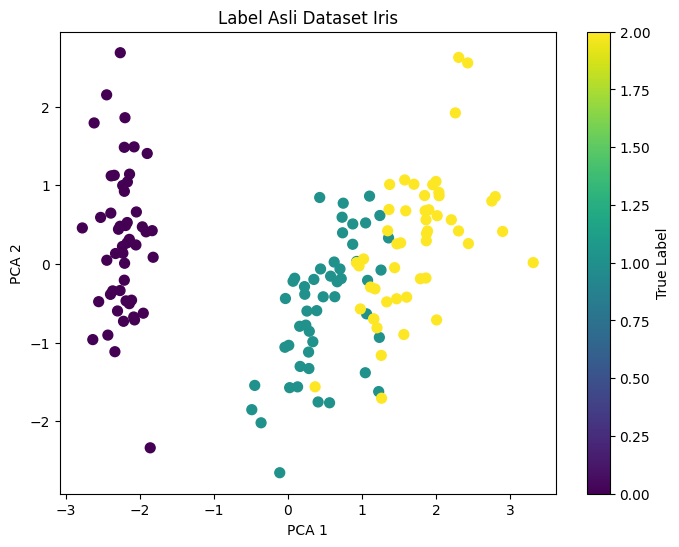

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=y, cmap='viridis', s=50)
plt.title('Label Asli Dataset Iris')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='True Label')
plt.show()


HDBSCAN berhasil menemukan 3 cluster utama, yang sesuai dengan jumlah spesies bunga di dataset iris (setosa, versicolor, virginica).

Ada sedikit noise (~4 data) yang tidak termasuk cluster mana pun — ini wajar karena HDBSCAN mendeteksi titik yang tidak “cukup dekat” ke salah satu cluster.

Cluster 0 kemungkinan besar merepresentasikan Iris Setosa (paling terpisah secara fitur).

Cluster 1 dan 2 mewakili Versicolor dan Virginica, yang memang agak tumpang tindih di ruang fitur sehingga HDBSCAN dapat memisahkannya sebagian besar dengan benar.

Dengan demikian, hasil clustering cukup konsisten dengan label asli meski tidak 100% identik (karena HDBSCAN adalah metode unsupervised).